<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Part.4/10.ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예제 10-1. 지수 가중 이동 평균 예시

### 스페인 수출량 데이터 지수 가중 이동 평균

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#### 데이터 불러오기

In [2]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.4/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
spain_exports = global_economy[global_economy['Code'] == 'ESP']
spain_exports.index = spain_exports['Year']
spain_exports

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,,
1960-01-01,Spain,ESP,1960-01-01,1.207213e+10,NaN,2.858811,6.901322,8.366730,30455000.0
1961-01-01,Spain,ESP,1961-01-01,1.383430e+10,11.838674,2.881946,8.601502,7.972356,30739250.0
1962-01-01,Spain,ESP,1962-01-01,1.613855e+10,9.953438,3.046404,10.119127,8.303654,31023366.0
1963-01-01,Spain,ESP,1963-01-01,1.907491e+10,9.596499,3.312772,10.780057,7.712289,31296651.0
1964-01-01,Spain,ESP,1964-01-01,2.134384e+10,5.308510,3.543979,11.383630,8.811759,31609195.0
1965-01-01,Spain,ESP,1965-01-01,2.475696e+10,6.253135,4.012285,13.145972,8.193160,31954292.0
1966-01-01,Spain,ESP,1966-01-01,2.872106e+10,7.246060,4.262666,13.556254,8.892850,32283194.0
1967-01-01,Spain,ESP,1967-01-01,3.164712e+10,4.340338,4.535120,11.883607,8.551116,32682947.0
1968-01-01,Spain,ESP,1968-01-01,3.147555e+10,6.597020,4.759806,12.600409,10.568613,33113134.0


#### 지수 가중 이동 평균 모델 적합

In [3]:
fit = ETSModel(spain_exports['Exports']).fit()

#### 모델 예측

In [4]:
forecast = fit.forecast(5)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

#### 예측 시각화

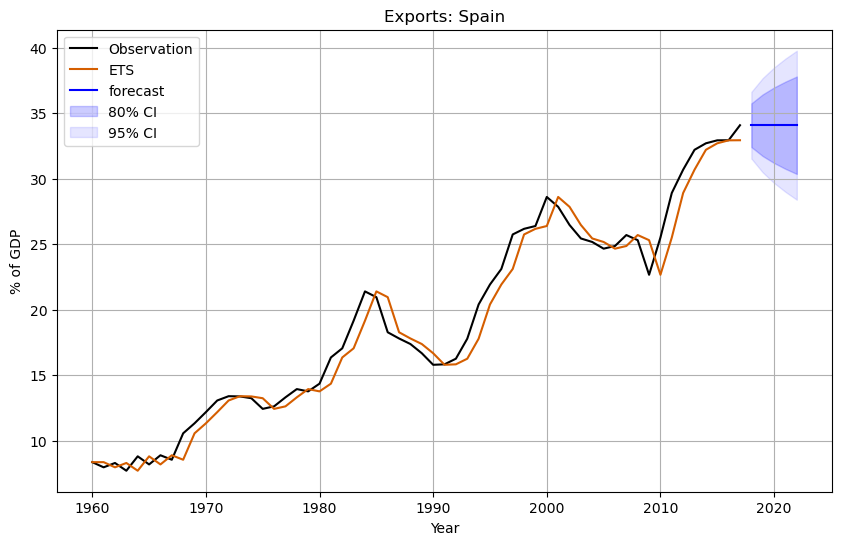

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(spain_exports['Exports'], label='Observation', color='black')
plt.plot(fit.fittedvalues, label='ETS', color='#D55E00')
plt.plot(forecast, label='forecast', color='b')
plt.fill_between(forecast.index, lower_ci80, upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(forecast.index, lower_ci95, upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Exports: Spain')
plt.grid(True)
plt.legend()
plt.show()

## 예제 10-2. 홀트 선형 추세 및 감쇠 추세 평활화 기법 예시

### 1) 스페인 수출량 데이터 홀트 선형 추세 및 감쇠 추세 평활화 기법

#### 필요한 패키지 불러오기

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#### 데이터 불러오기

In [7]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.4/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
spain_exports = global_economy[global_economy['Code'] == 'ESP']
spain_exports.index = spain_exports['Year']

#### 홀트 선형 추세 및 감쇠 추세법 모델 적합

In [8]:
fit1 = ETSModel(spain_exports['Exports'], trend='add').fit()
fit2 = ETSModel(spain_exports['Exports'], trend='add', damped_trend=True).fit_constrained({"damping_trend": 0.9})

#### 모델 예측

In [9]:
forecast1 = fit1.forecast(15)
forecast2 = fit2.forecast(15)

#### 예측 시각화

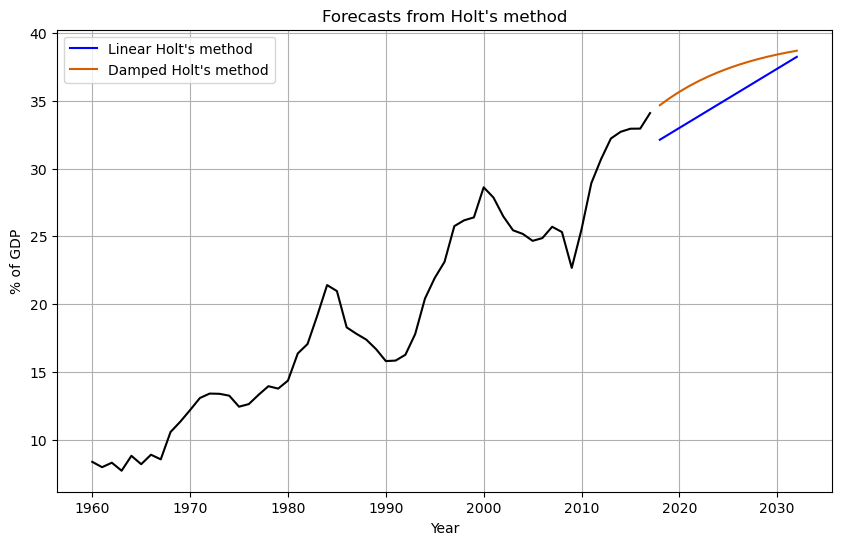

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(spain_exports['Exports'],  color='black')
plt.plot(forecast1, label='Linear Holt\'s method', color='b')
plt.plot(forecast2, label='Damped Holt\'s method', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Forecasts from Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

### 2) 인터넷 유저 데이터 홀트 선형 추세 및 감쇠 추세평활화 기법

#### 필요한 패키지 불러오기

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#### 데이터 불러오기

In [12]:
www_usage = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.4/data/WWWusage.csv', index_col=1)
www_usage = www_usage[['value']]
www_usage

,value
time,
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226


#### 감쇠 추세법 모델 적합

In [13]:
fit = ETSModel(www_usage['value'], trend='add', damped_trend=True).fit()

#### 모델을 이용한 예측

#### 예측값 구하기

In [14]:
forecast = fit.forecast(10)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

#### 예측 시각화

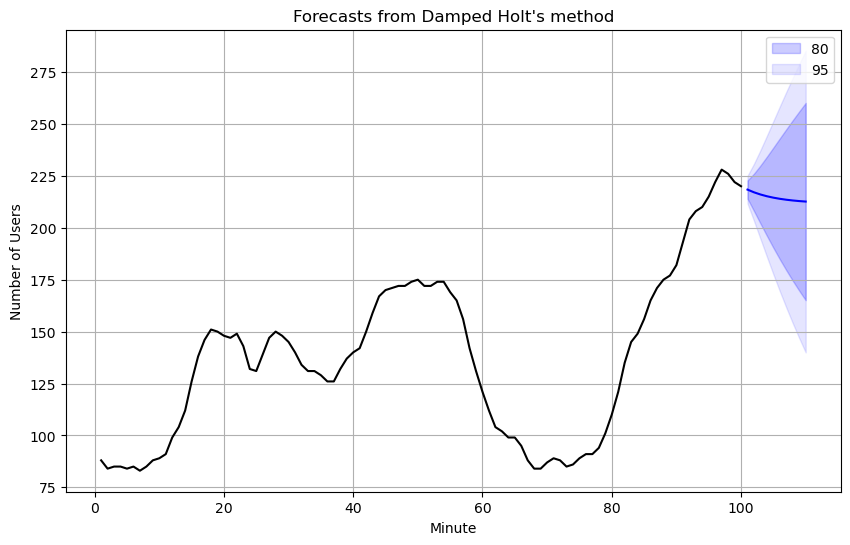

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(www_usage['value'], color='black')
plt.plot(forecast.index+1, forecast.values, color='b')
plt.fill_between(forecast.index+1, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast.index+1, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Minute')
plt.ylabel('Number of Users')
plt.title('Forecasts from Damped Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

## 예제 10-3. 홀트-윈터스 평활화 기법 예시

### 스페인 수출량 데이터 홀트-윈터스 평활화 기법

#### 필요한 패키지 불러오기

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#### 데이터 불러오기

In [17]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.4/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
spain_exports = global_economy[global_economy['Code'] == 'ESP']
spain_exports.index = spain_exports['Year']

#### 홀트-윈터스 가산법 적합

In [18]:
fit_add1 = ETSModel(spain_exports['Exports'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.00})
fit_add2 = ETSModel(spain_exports['Exports'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.72})
fit_add3 = ETSModel(spain_exports['Exports'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 1.00})

#### 가산법 모델 시각화

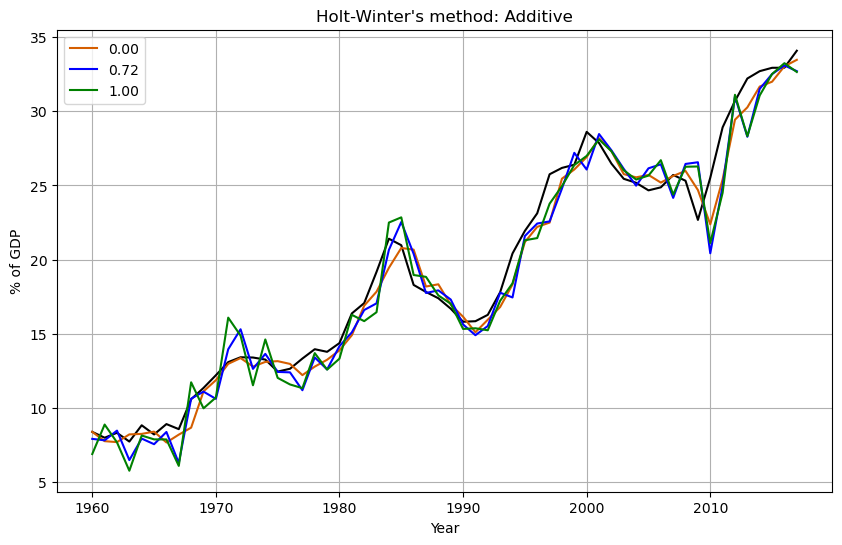

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(spain_exports['Exports'],  color='black')
plt.plot(fit_add1.fittedvalues, label='0.00', color='#D55E00')
plt.plot(fit_add2.fittedvalues, label='0.72', color='b')
plt.plot(fit_add3.fittedvalues, label='1.00', color='green')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Holt-Winter\'s method: Additive')
plt.grid(True)
plt.legend()
plt.show()

#### 홀트-윈터스 승산법 적합

In [20]:
fit_mul1 = ETSModel(spain_exports['Exports'], seasonal='mul', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.00})
fit_mul2 = ETSModel(spain_exports['Exports'], seasonal='mul', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.72})
fit_mul3 = ETSModel(spain_exports['Exports'], seasonal='mul', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 1.00})

#### 승산법 모델 시각화

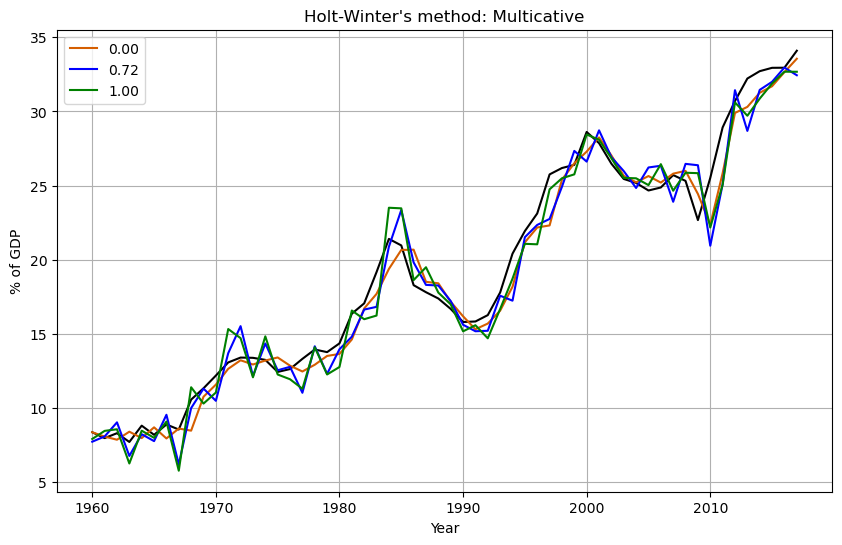

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(spain_exports['Exports'],  color='black')
plt.plot(fit_mul1.fittedvalues, label='0.00', color='#D55E00')
plt.plot(fit_mul2.fittedvalues, label='0.72', color='b')
plt.plot(fit_mul3.fittedvalues, label='1.00', color='green')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Holt-Winter\'s method: Multicative')
plt.grid(True)
plt.legend()
plt.show()

#### 모델 예측

In [22]:
forecast_add = fit_add1.forecast(12)
forecast_mul = fit_mul1.forecast(12)

#### 예측 시각화

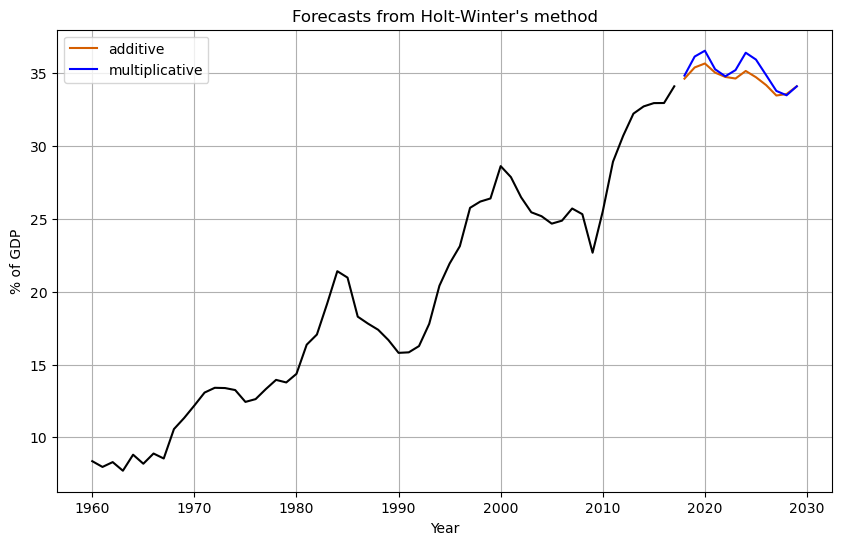

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(spain_exports['Exports'],  color='black')
plt.plot(forecast_add, label='additive', color='#D55E00')
plt.plot(forecast_mul, label='multiplicative', color='b')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Forecasts from Holt-Winter\'s method')
plt.grid(True)
plt.legend()
plt.show()